In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Networks

## Convolutional Neural Network
### Fashion MNIST Dataset

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from collections.abc import Callable
from typing import Literal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 

%matplotlib inline

2023-12-05 11:10:31.180260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# gpus = tf.config.list_physical_devices('GPU')

# try:
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
# except:
#     print ('invalid device')

In [11]:
###----------------
### Some parameters
###----------------

inpDir = '/home/dai/Documents/DNN/7.DNN/input'
outDir = '../output'
subDir = 'flower_photos'
modelDir = '.../models'
altname= 'cc_base'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE = 0.2
EPOCHS = 10 # number of epochs
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2
BATCH_SIZE = 32
LR_PATIENCE = 2
FACTOR_LR = 0.5
PATIENCE = 4

IMG_HEIGHT = 190
IMG_WIDTH = 190

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [12]:


def fn_plot_label(train_ds , test_ds):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)

    train_labels = tf.concat([lbl for img, lbl in train_ds], axis=0).numpy()

    unique, _, counts = tf.unique_with_counts(train_labels)

    plt.bar(range(len(unique)), counts, align='center', color = 'DarkBlue')

    plt.xticks(range(len(unique)), class_names)

    plt.title('training set')

    plt.subplot(1,2,2)

    test_labels = tf.concat([lbl for img, lbl in test_ds], axis=0).numpy()

    unique, _, counts = tf.unique_with_counts(test_labels)

    plt.bar(range(len(unique)), counts, align='center', color = 'Orange')

    plt.xticks(range(len(unique)), class_names)

    plt.title('testing set')
    
                                     


## Generate Data Set
Flower Dataset

In [13]:
class_label = {0 : 'T-shirt/Top',
               1 : 'Trouser',
               2 : 'Pullover',
               3 : 'Dress',
               4 : 'Coat',
               5 : 'Sandal',
               6 : 'Shirt',
               7 : 'Sneaker',
               8 : 'Bag',
               9 : 'Ankle boot'}

In [14]:
data_dir = os.path.join(inpDir, subDir)
data_dir

'/home/dai/Documents/DNN/7.DNN/input/flower_photos'

In [15]:
os.listdir(data_dir)

['LICENSE.txt', 'daisy', 'roses', 'tulips', 'dandelion', 'sunflowers']

In [16]:
## DATASET for training

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = TEST_SIZE,
    subset = 'training',
    seed = RANDOM_STATE,
    image_size= [IMG_HEIGHT, IMG_WIDTH],
    batch_size= BATCH_SIZE
)

## DATASET for testing

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = TEST_SIZE,
    subset = 'validation',
    seed = RANDOM_STATE,
    image_size= [IMG_HEIGHT, IMG_WIDTH],
    batch_size= BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2023-12-05 11:10:59.961409: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
# is it picking class names
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

2023-12-05 11:11:00.559280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:00.560280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]


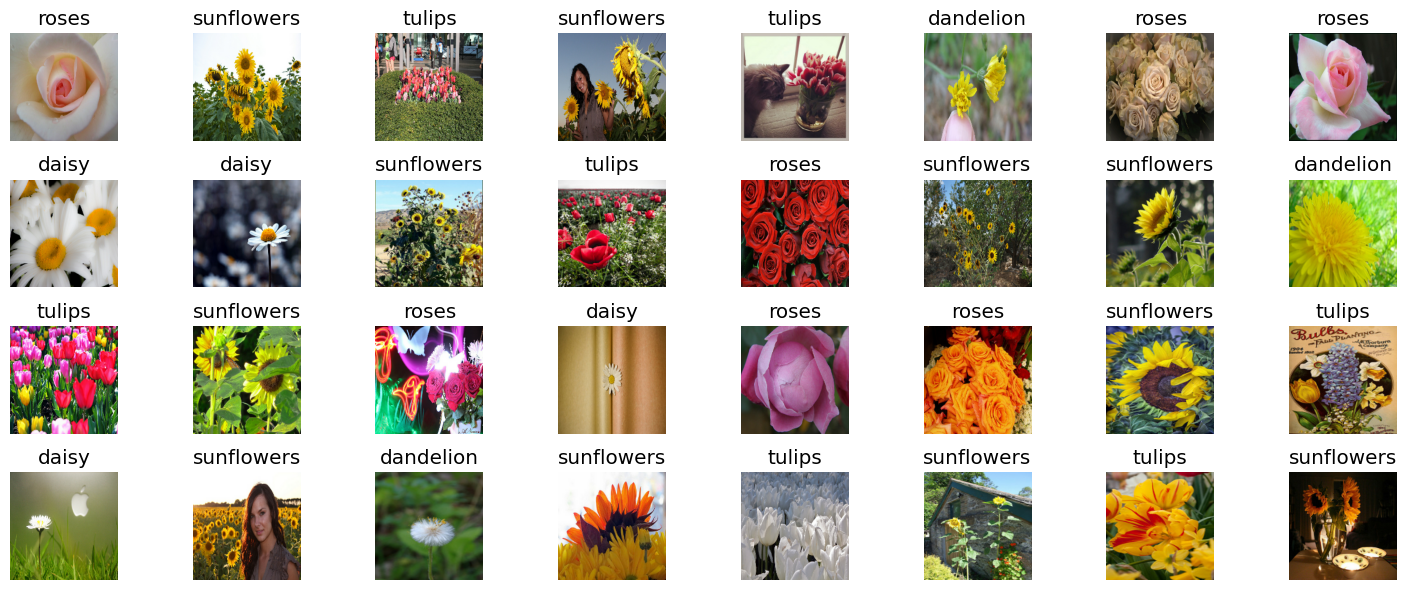

In [18]:
plt.figure(figsize=(15,6))

for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot(int(BATCH_SIZE/8),8, i+1)
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[labels[i]])
    plt.tight_layout()
plt.show()

2023-12-05 11:11:04.284454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:04.285872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


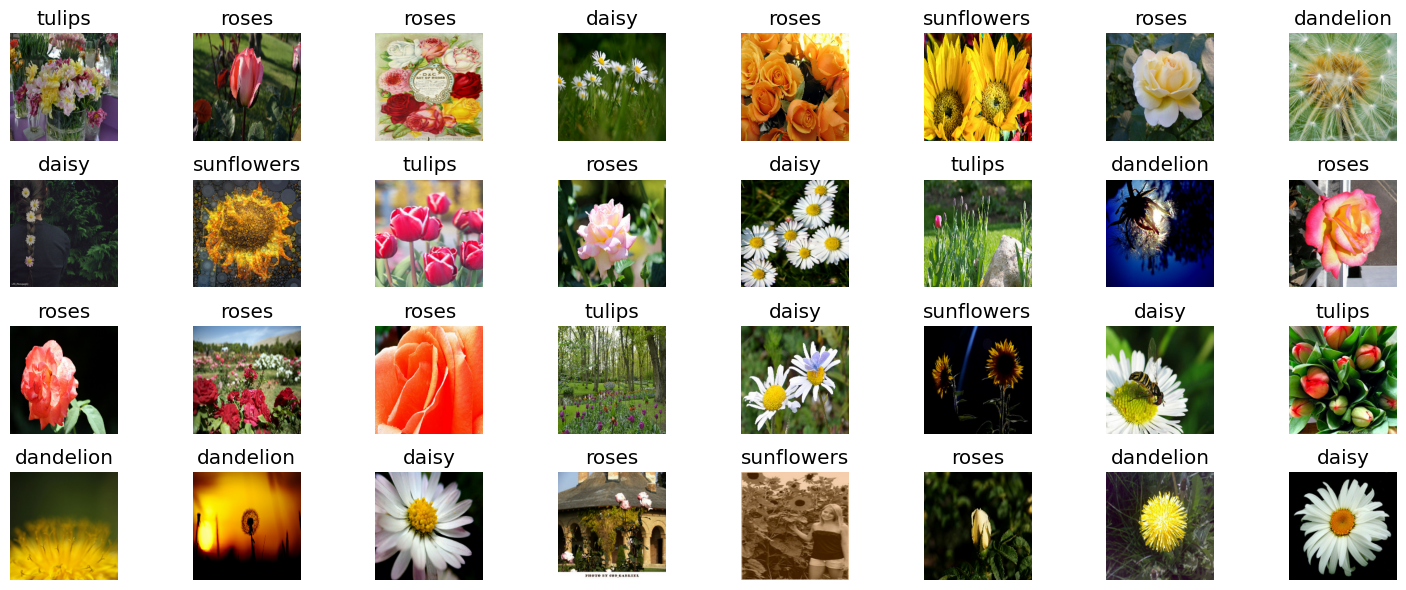

In [19]:
plt.figure(figsize=(15,6))

for images, labels in test_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot(int(BATCH_SIZE/8),8, i+1)
        plt.grid(False)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[labels[i]])
    plt.tight_layout()
plt.show()

2023-12-05 11:11:07.898343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:07.899703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:29.375099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 

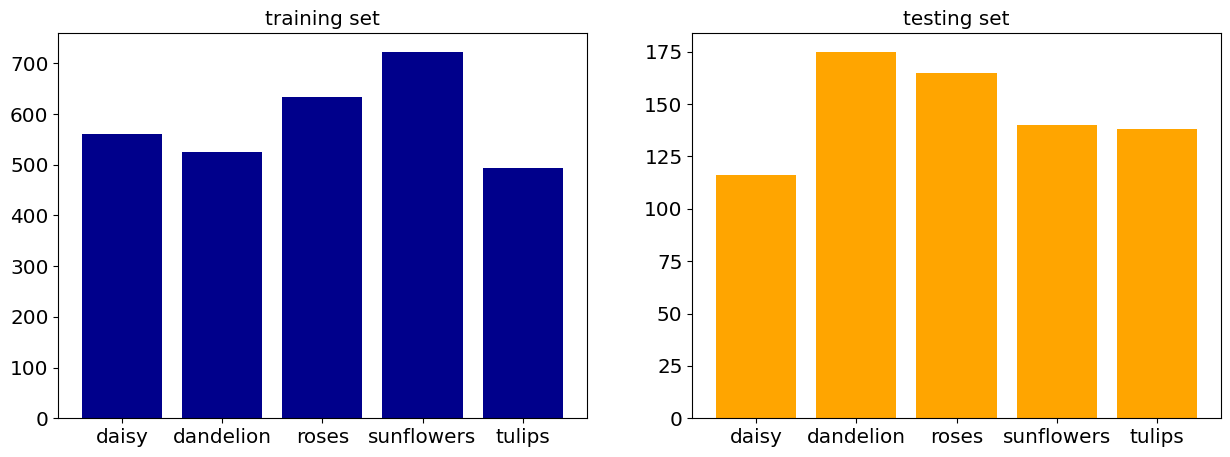

In [20]:
fn_plot_label(train_ds, test_ds)

In [21]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

## Random Zoom

2023-12-05 11:11:30.232480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:30.233718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


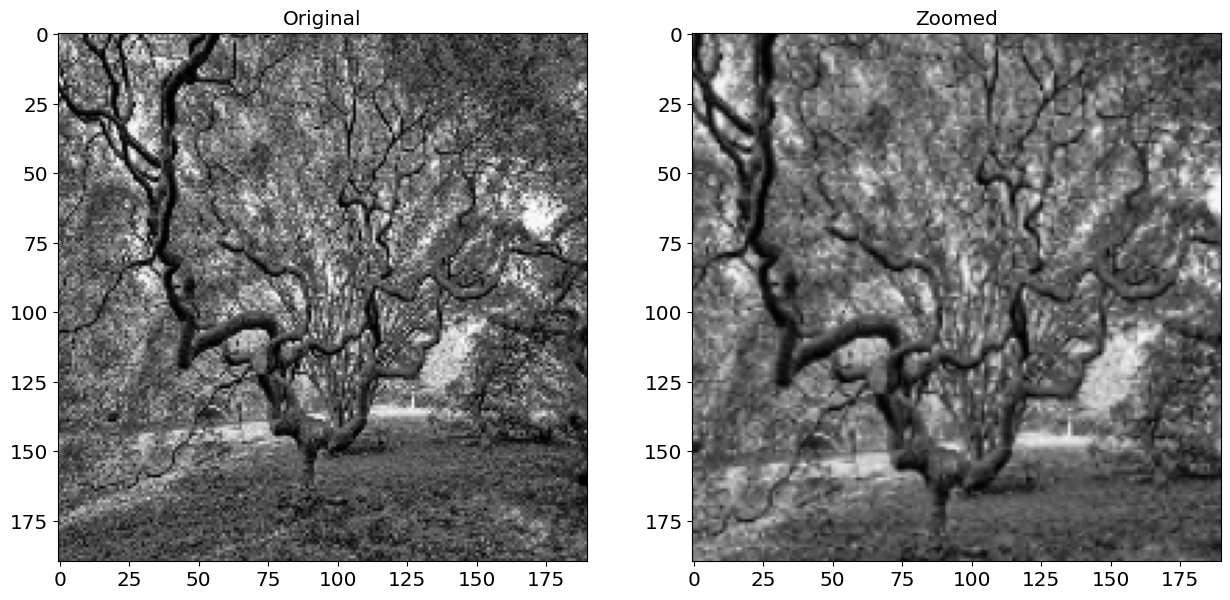

In [22]:
layer = tf.keras.layers.RandomZoom(height_factor = (-0.2, -0.2),
                                   width_factor = (-0.2, -0.2))
plt.figure()
img_num = 3

for images, labels in test_ds.take(1):
    out_images = layer(images)

    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(images[img_num].numpy().astype('uint8'))

    plt.subplot(1,2,2)
    plt.title('Zoomed')
    plt.imshow(out_images[img_num].numpy().astype('uint8'))

2023-12-05 11:11:31.513571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:11:31.514950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


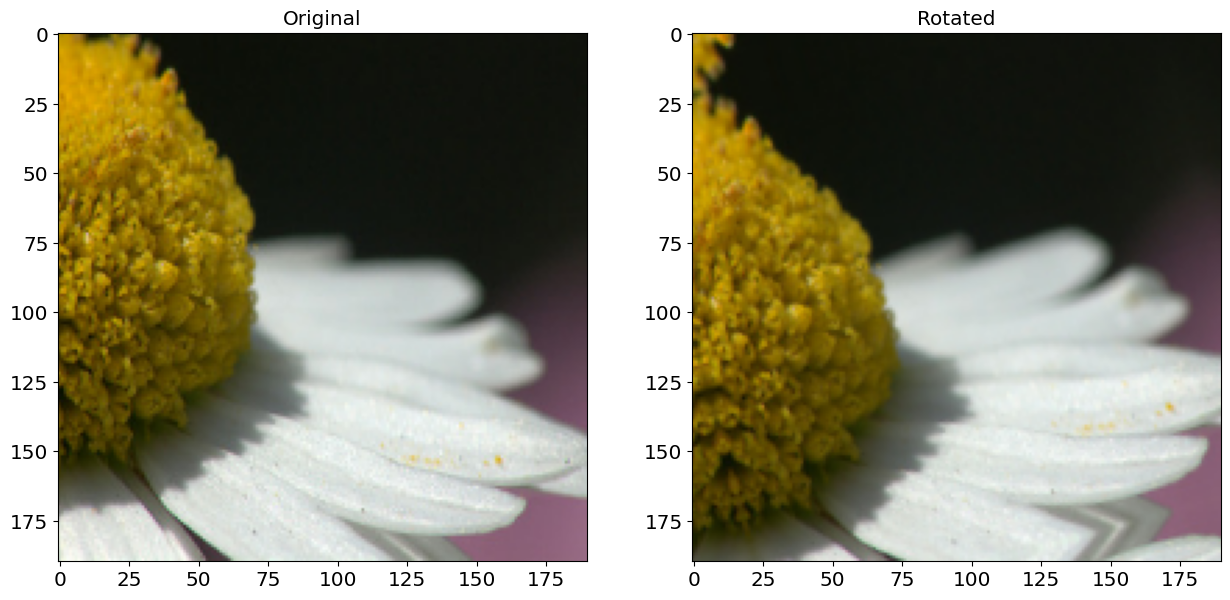

In [23]:
layer = tf.keras.layers.RandomRotation(
    factor=(-0.2, 0.2),
    fill_mode='reflect',
    interpolation='bilinear',
    fill_value=0.0,
)
plt.figure()
img_num = 3

for images, labels in test_ds.take(1):
    out_images = layer(images)

    plt.subplot(1,2,1)
    plt.title('Original')
    plt.imshow(images[img_num].numpy().astype('uint8'))

    plt.subplot(1,2,2)
    plt.title('Rotated')
    plt.imshow(out_images[img_num].numpy().astype('uint8'))

In [24]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
#Model

model= tf.keras.Sequential()

model.add(tf.keras.layers.Rescaling(1/255.))

##set 1
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))  # 94 X 94 X 8

##set 2
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))  # 4 X 4 X 16

##set 3
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))  # 4 X 4 X 32

##set 4
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))  # 4 X 4 X 64

##set 5
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))

model.add(tf.keras.layers.MaxPool2D(2,2))  # 4 X 4 X 128

# ## Set nn 
model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))


## Set nn
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(5))

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_loss',
    patience= PATIENCE,
    mode = 'auto',
    baseline= None,
    verbose = 1,
    restore_best_weights=True,
    start_from_epoch= 0
)

lr_decay = tf.keras.callbacks.ReduceLROnPlateau(
    monitor= 'val_loss',
    factor= FACTOR_LR,
    patience= PATIENCE,
    mode = 'auto',
    verbose = 1,
)



In [27]:
modelFile = os.path.join(modelDir, subDir, altname)

model_callback = tf.keras.callbacks.ModelCheckpoint(
    modelFile,
    monitor= 'val_loss',
    mode = 'auto',
    verbose = 1,
    save_best_only=True,
    save_weights_only=True
)

In [28]:
optim = tf.keras.optimizers.Adam(learning_rate = ALPHA)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True)

model.compile(optimizer = optim, loss = loss_fn, metrics = ['accuracy'])

In [29]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, verbose = 1,batch_size=BATCH_SIZE,
                    callbacks=[early_stopping, lr_decay])

Epoch 1/10


2023-12-05 11:11:33.443697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]
2023-12-05 11:11:33.444920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]


92/92 [==============================] - ETA: 0s - loss: 1.4718 - accuracy: 0.3515

2023-12-05 11:12:10.112572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:12:10.113431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 40s 394ms/step - loss: 1.4718 - accuracy: 0.3515 - val_loss: 1.3624 - val_accuracy: 0.4264 - lr: 0.0010
Epoch 2/10
92/92 [==============================] - 35s 376ms/step - loss: 1.2125 - accuracy: 0.4908 - val_loss: 1.1681 - val_accuracy: 0.4986 - lr: 0.0010
Epoch 3/10
92/92 [==============================] - 32s 348ms/step - loss: 1.0247 - accuracy: 0.5777 - val_loss: 1.0119 - val_accuracy: 0.5790 - lr: 0.0010
Epoch 4/10
92/92 [==============================] - 31s 336ms/step - loss: 0.9263 - accuracy: 0.6226 - val_loss: 0.9519 - val_accuracy: 0.6226 - lr: 0.0010
Epoch 5/10
92/92 [==============================] - 32s 344ms/step - loss: 0.8495 - accuracy: 0.6570 - val_loss: 0.9585 - val_accuracy: 0.6117 - lr: 0.0010
Epoch 6/10
92/92 [==============================] - 33s 359ms/step - loss: 0.7947 - accuracy: 0.6768 - val_loss: 0.9108 - val_accuracy: 0.6540 - lr: 0.0010
Epoch 7/10
92/92 [==============================] - 31s 342ms/step - loss: 

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 190, 190, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 188, 188, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 94, 94, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        4

In [31]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.471794,0.351499,1.362439,0.426431,0.001
1,1.212466,0.490804,1.168125,0.498638,0.001
2,1.024676,0.577657,1.011895,0.579019,0.001
3,0.926344,0.622616,0.951892,0.622616,0.001
4,0.849521,0.657016,0.958490,0.611717,0.001


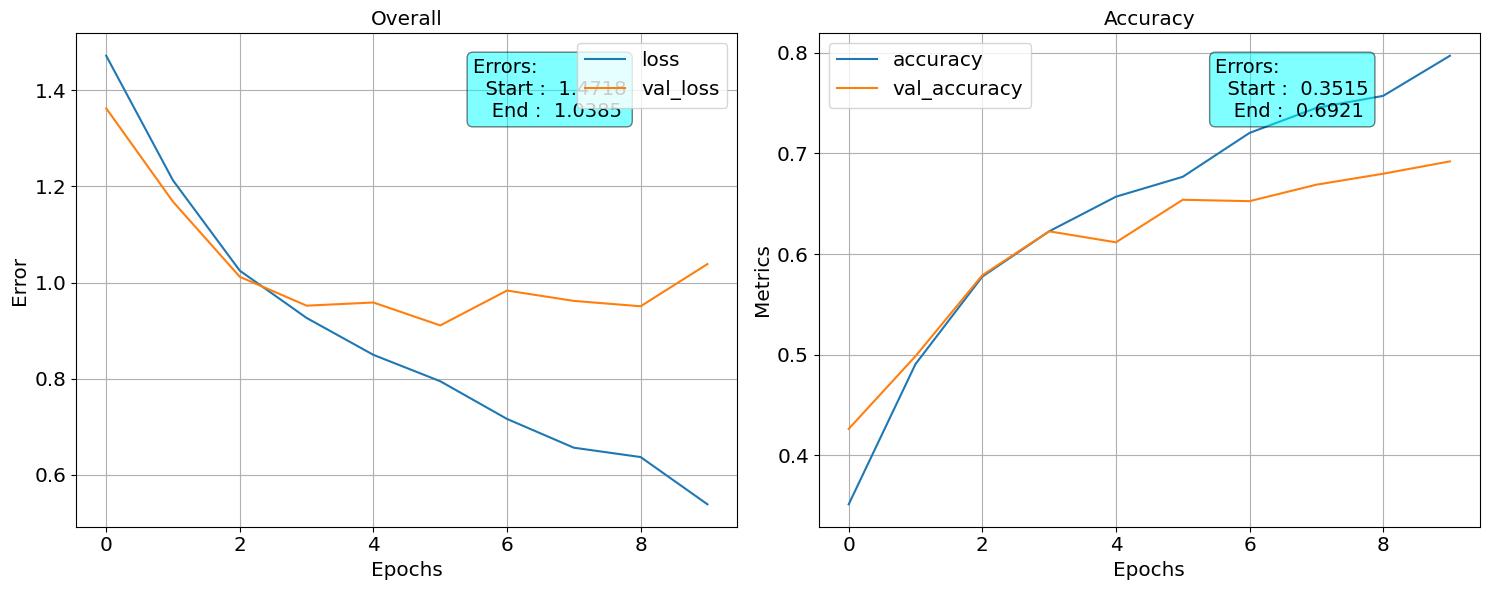

In [32]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]
y1 = loss_df.columns[0]
y2 = loss_df.columns[2]

loss_df.plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]
y1 = loss_df.columns[1]
y2 = loss_df.columns[3]
loss_df[-l_range:].plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Metrics")
ax.set_title(y1.capitalize())
ax.grid();
plt.tight_layout()

In [33]:
loss_df[loss_df['val_loss'] == loss_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy,lr
5,0.794696,0.676771,0.910802,0.653951,0.001
